In [8]:
from numpy import * 
from numpy.random import * 
import numpy as np
from matplotlib import *


def bernoulli(p):
    return uniform(0, 1) < p

def L(x): 
    return -.5*x**2
def dL(x):
    return -x

e = .05
Emax = 1000.

def Leapfrog(q, r, s):

    r1 = r + (s/2)*dL(q)
    q1 = q + s * r1
    r1 = r1 + (s/2)*dL(q1)
    return q1, r1
    
        
def step(qm1):
    r0 = normal([0])
    u = uniform(0, exp(L(qm1) - .5* r0.dot(r0) ))

    qn = qm1
    qp = qm1
    rn = r0
    rp = r0
    j = 0
    qm = qm1
    n = 1
    s = 1
    while s == 1:
        vj = bernoulli(.5) * 2 - 1
        if vj == -1:
            qn , rn , _, _, qprime , nprime , sprime = BuildTree(qn , rn , u, vj , j)
        else:
            _, _, qp , rp , qprime , nprime , sprime = BuildTree(qp , rp , u, vj , j)

        if sprime == 1:
            if bernoulli(min(1, nprime*1.0/n)):
                qm = qprime 
                #print "BT accept " + str(qm)
            else: 
                #print "BT reject " + str(qm)
    
                pass
        n=n+nprime
        s = sprime * ((qp - qn ).dot(rn) >= 0) * ((qp - qn ).dot(rp) >= 0)
        j = j + 1
        
    return qm

def BuildTree(q, r, u, v, j):
    if j == 0:
        #Base case—take one leapfrog step in the direction v.
        qprime , rprime = Leapfrog(q, r, v*e)
        nprime = (u <= exp(L(qprime ) - .5*rprime.dot(rprime)))*1

        sprime = (u < exp(Emax + L(qprime) - .5*rprime.dot(rprime)))

        return qprime , rprime , qprime , rprime , qprime , nprime , sprime 
    else:
        #Recursion—implicitly build the left and right subtrees.
        qn , rn , qp , rp , qprime , nprime , sprime = BuildTree(q, r, u, v, j - 1)
        if sprime == 1:
            if v == -1:
                qn , rn , _, _, qprime2 , nprime2 , sprime2 = BuildTree(qn , rn , u, v, j - 1)
            else:
                _, _, qp , rp , qprime2 , nprime2 , sprime2 = BuildTree(qp , rp , u, v, j - 1)

            if bernoulli(nprime2*1.0/(nprime +nprime2)):
                qprime = qprime2 
                #print "BT accept " + str(qprime)
            else: 
                #print "BT reject " + str(qprime)

                pass
            sprime = sprime2 *((qp - qn ).dot(rn) >= 0)* ((qp - qn ).dot(rp) >= 0)
            nprime = nprime + nprime2

        return qn , rn , qp , rp , qprime , nprime , sprime 

    

In [9]:
samples = []
q = np.array([0.])
for i in range(2000):
    samples.append(q)
    q = step(q)

print std(samples)
plot(samples)

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:65: RuntimeWarning: overflow encountered in exp
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:77: RuntimeWarning: invalid value encountered in divide


1.01298145675


NameError: name 'plot' is not defined

In [ ]:
numpy.random.seed(1)
q = np.array([0.])
print step(q)


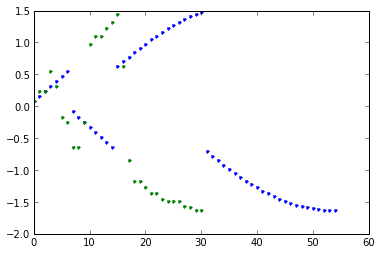

In [4]:
plot(d,'.')
plot(g,'.')

In [12]:
True + True

2